<img src='images/C1Peak_Cyrano.jpg' style='width: 100px; float:right'>

# <span style = 'color:darkblue; float:right'> C1PEAK 

---------
# Simple Observation Analysis on Traces

Here we are providing an example on the AES. 
--------

In [6]:
import estraces
import scared

In [7]:
import numpy as np

In [8]:
ths = estraces.read_ths_from_ets_file("../Traces/AES_simu_2k_random_set_desync.ets") 

In [9]:
print(ths)

Trace Header Set:
Name.............: ETS Format THS
Reader...........: ETS format reader of file ../Traces/AES_simu_2k_random_set_desync.ets with 2000 traces.
ciphertext.......: uint8
key..............: uint8
plaintext........: uint8



In [10]:
ths.metadata_tags

['ciphertext', 'key', 'plaintext']

In [11]:
import matplotlib.pyplot as plt

In [12]:
#%matplotlib inline
#%matplotlib widget

In [13]:
plt.rcParams['figure.figsize']=(16,4)

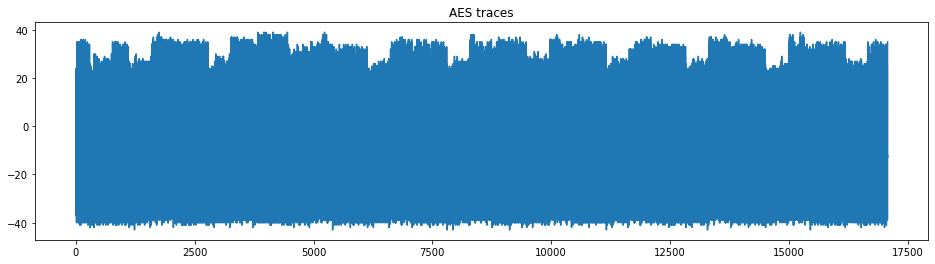

In [14]:
plt.plot(ths.samples[0:1].T)
plt.title('AES traces')
plt.show()

### Are the traces aligned?

In [15]:
import ipywidgets as widgets

In [16]:
@widgets.interact(x1=(0, 15000, 100), x2 = (100, 16000, 100), nb_traces = (1,10,1))
def plot_curve(x1,x2, nb_traces):
    """
    Print the trace on top figure
    Plot the sgement selected by widget in second figure
    """
    plt.rcParams['figure.figsize']=(16,7)

    plt.subplot(2,1,1) 
    plt.title('AES traces full and range(x1,x2)') 
    plt.axvspan(x1, x2, color='red', alpha=1)
    plt.plot(ths.samples[0:nb_traces].T)
   
    plt.subplot(2,1,2)
    plt.plot(ths.samples[0:nb_traces].T[x1:x2])
   
    plt.show()

interactive(children=(IntSlider(value=7500, description='x1', max=15000, step=100), IntSlider(value=8000, desc…

#### Conclusion: traces are not aligned (or have been aligned)

## How can you check on several traces
Compute the mean and the standard deviation on the set of traces

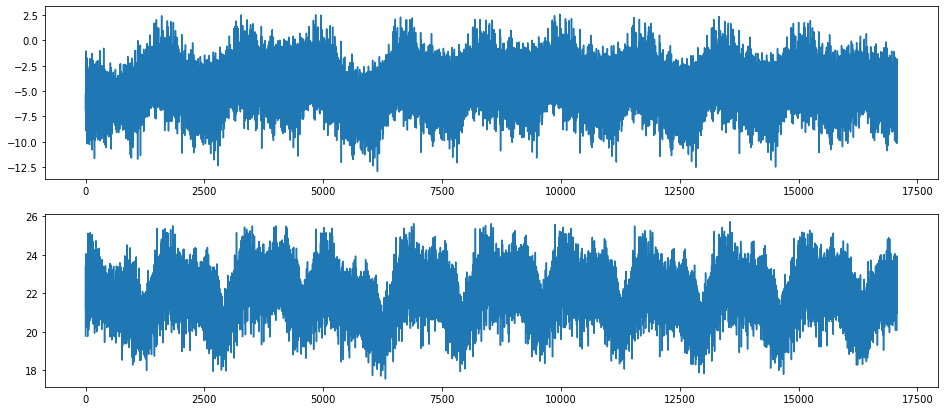

In [12]:
trace_mean = np.mean(ths.samples[0:100], axis = 0)
trace_std = np.std(ths.samples[0:100], axis = 0)
plt.subplot(2,1,1) 
plt.plot(trace_mean.T)
plt.subplot(2,1,2) 
plt.plot(trace_std.T)
plt.show()

In [13]:
ths = estraces.read_ths_from_ets_file("../Traces/AES_simu_2k_random_set.ets") 

In [ ]:
## Coder les fonctions

#trace = np.mean(...)





### Solution donné à titre d'exemple

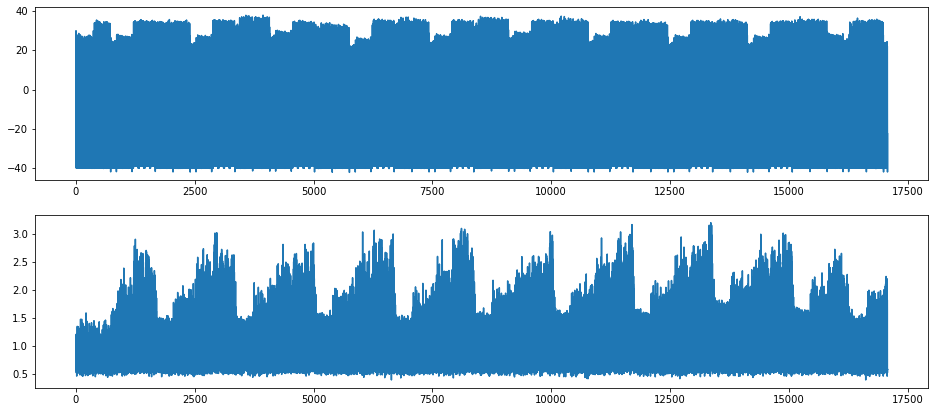

In [14]:
trace_mean = np.mean(ths.samples[0:100], axis = 0)
trace_std = np.std(ths.samples[0:100], axis = 0)
plt.subplot(2,1,1) 
plt.plot(trace_mean.T)
plt.subplot(2,1,2) 
plt.plot(trace_std.T)
plt.show()

### Identify AES operations areas in the trace

In [17]:
@widgets.interact(period = (1,500,10))
def plot_mov_var(period):
    """
    Print the trace on top figure
    Plot the segment with moving mean(period) in second figure
    Plot the segment with moving var(period) in second figure    
    Plot the segment with moving Kurtosis(period) in third figure        
    """
    plt.rcParams['figure.figsize']=(16,14)

    plt.subplot(4,1,1) 
    plt.title('AES traces full and range(x1,x2)') 
    plt.plot(ths.samples[0:1].T)
   
    plt.subplot(4,1,2)
    plt.title('Moving mean on the trace', fontsize=14)    
    trace_moving_mean = scared.signal_processing.moving_mean(ths.samples[0:1], period).T
    plt.plot(trace_moving_mean)    

    plt.subplot(4,1,3)
    plt.title('Moving variance on the trace', fontsize=14)    
    trace_moving_mean = scared.signal_processing.moving_var(ths.samples[0:1], period).T
    plt.plot(trace_moving_mean)    

    plt.subplot(4,1,4)
    plt.title('Moving Kurtosis on the trace', fontsize=14)    
    trace_moving_mean = scared.signal_processing.moving_kurtosis(ths.samples[0:1], period).T
    plt.plot(trace_moving_mean)    
    
    plt.show()

interactive(children=(IntSlider(value=241, description='period', max=500, min=1, step=10), Output()), _dom_cla…

In [18]:
%matplotlib inline

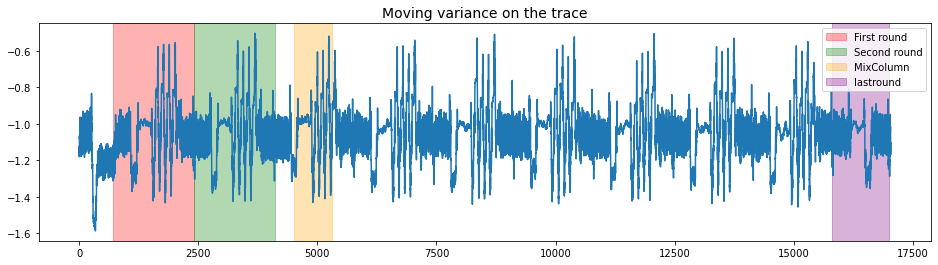

In [19]:
period = 40
plt.rcParams['figure.figsize']=(16,4)
plt.title('Moving variance on the trace', fontsize=14)    
trace_moving_mean = scared.signal_processing.moving_kurtosis(ths.samples[0:1], period).T
plt.axvspan(700, 2400, color='red', alpha=0.3, label = 'First round')
plt.axvspan(2400, 4100, color='green', alpha=0.3, label = 'Second round')
plt.axvspan(4500, 5300, color='orange', alpha=0.3, label = 'MixColumn')
plt.axvspan(15800, 17000, color='purple', alpha=0.3, label = 'lastround')
plt.legend(loc='upper right')
plt.plot(trace_moving_mean)
plt.show()

We obvserve better the 10 round and inner operations:only 9 operations that must then be the MixColumn.